In [15]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [2]:
data = pd.read_csv("DATA2.csv")

In [3]:
data

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


In [75]:
X = data.drop('Age', axis = 1)
Y = data.Age.values

In [76]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [79]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)



Training Accuracy for Multiple Linear Regression Model:  0.8606321489465106
Testing Accuracy for Multiple Linear Regression Model:  0.856165378016878
RMSE for Training Data:  7.469098605888389
RMSE for Testing Data:  7.680844761268997


RMSE for test 7.659065174705188
Accuracy of test 0.7732989718089578


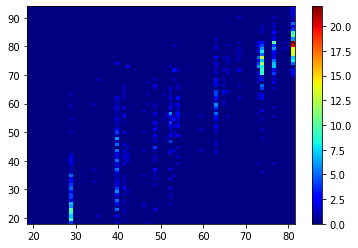

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score 

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

#plt.hist2d(y_1, y_2, (100, 100), cmap=plt.cm.jet)
#plt.colorbar()

#accuracy_DT_trains = r2_score(

#rmse_train = np.sqrt(mean_squared_error(y_train,y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
#r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_2,y_pred)
    
print("RMSE for test", rmse_test)
print("Accuracy of test", r2_test)

plt.hist2d(y_2, y_test, (70, 70), cmap=plt.cm.jet)
plt.colorbar()

Mean squared error: 58.66
Coefficient of determination:  0.8569799283061859


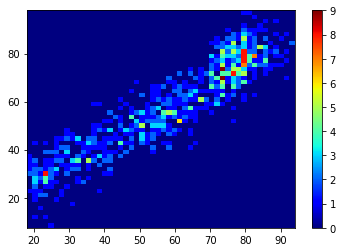

In [84]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("Coefficient of determination: ", r2_score(y_test, y_pred))

plt.hist2d(y_test, y_pred, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

PLS r-squared: 0.6532538169665678


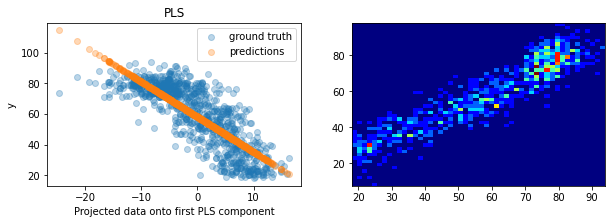

In [93]:
#Partial Least Squares Regression
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=1)
pls.fit(x_train, y_train)

print("PLS r-squared:", pls.score(x_test, y_test))


fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pls.transform(x_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pls.transform(x_test), pls.predict(x_test), alpha=0.3, label="predictions"
)
axes[0].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[0].legend()
axes[1].hist2d(y_test, y_pred, (50, 50), cmap=plt.cm.jet)
plt.show()
